<a href="https://colab.research.google.com/github/egyptai/KNN/blob/main/Iris20210603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
iris = load_iris()

print(iris.keys())
print(iris['data'])
print(iris['target'])
print(iris['DESCR'])
print(iris['target_names'])
print(iris['feature_names'])
print(iris['data'].shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.

In [10]:
# Train 데이터 세트와 Test 데이터 세트를 구성한다
trainX, testX, trainY, testY = \
    train_test_split(iris['data'], iris['target'], test_size = 0.2)

In [11]:
# KNN 으로 Train 데이터 세트를 학습한다.
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = knn.score(testX, testY)와 동일함.
predY = knn.predict(testX)
accuracy = (testY == predY).mean()
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)


* 시험용 데이터로 측정한 정확도 = 0.97


In [13]:
# Train 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
predY = knn.predict(trainX)
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

* 학습용 데이터로 측정한 정확도 = 0.97


In [14]:
# k를 변화시켜가면서 정확도를 측정해 본다
testAcc = []
trainAcc = []
for k in range(1, 50):
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(trainX, trainY)
    
    # Test 세트의 Feature에 대한 정확도
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))
    
    # Train 세트의 Feature에 대한 정확도
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))

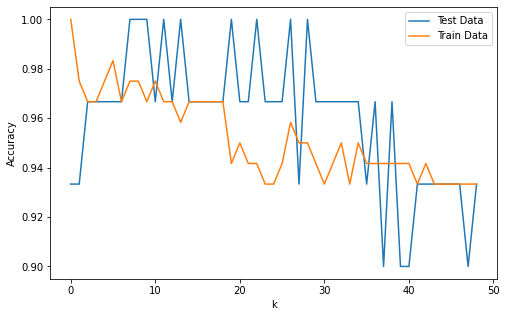

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()